In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import collections
import ast

In [2]:
import tensorflow

In [3]:
from keras.preprocessing import text, sequence

In [4]:
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
import torch
from torch.utils.data import DataLoader, TensorDataset

/opt/homebrew/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
from tensorflow.keras.models import load_model

In [6]:
model = load_model('GRU.h5')

In [7]:
df_combined = pd.read_csv('/Users/ved/Desktop/Sem 7/DL Project/Tokenized_Data/df_combined.csv')
df_combined_test = pd.read_csv('/Users/ved/Desktop/Sem 7/DL Project/Tokenized_Data/df_combined_test.csv')

In [8]:
df_test = pd.read_csv("/Users/ved/Desktop/Sem 7/DL Project/Dataset/test_labels.csv")

In [9]:
for i in range(len(df_combined['comment'])):
    df_combined["comment"][i] = ast.literal_eval(df_combined["comment"][i])
for i in range(len(df_combined_test['comment'])):
    df_combined_test["comment"][i] = ast.literal_eval(df_combined_test["comment"][i])

/var/folders/1m/v10vjxqd235fn30s91s6nnx40000gn/T/ipykernel_23885/2731769266.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_combined["comment"][i] = ast.literal_eval(df_combined["comment"][i])
/var/folders/1m/v10vjxqd235fn30s91s6nnx40000gn/T/ipykernel_23885/2731769266.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_combined_test["comment"][i] = ast.literal_eval(df_combined_test["comment"][i])


In [10]:
X_train1 = df_combined['comment']
X_test1 = df_combined_test['comment']
max_features = 30000
maxlen = 100

In [11]:
from keras.preprocessing.sequence import pad_sequences

In [12]:
tokenizer = text.Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(X_train1) + list(X_test1))

In [13]:
X_test = tokenizer.texts_to_sequences(X_test1)
x_test = sequence.pad_sequences(X_test, maxlen=maxlen)
y_pred = model.predict(x_test, batch_size=1024)
y_pred = (y_pred > 0.5).astype(int)

63/63 [==============================] - 14s 215ms/step


In [14]:
type(y_pred)

numpy.ndarray

In [15]:
y_actual = df_combined_test
y_actual.drop(columns="comment",inplace=True)

In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming y_actual contains the true labels and y_predicted contains the predicted labels
# You can replace these with your actual and predicted labels # Replace with your true labels
y_predicted = y_pred # Replace with your predicted labels

# Calculate accuracy
accuracy = accuracy_score(y_actual, y_predicted)

# Calculate precision, recall, and F1-score
precision = precision_score(y_actual, y_predicted,average='micro')
recall = recall_score(y_actual, y_predicted,average='micro')
f1 = f1_score(y_actual, y_predicted,average='micro')

# Print the results
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")


Accuracy: 0.8662196380005627
Precision: 0.5359717248755987
Recall: 0.7949372327217548
F1-score: 0.6402599927779785


In [17]:

tokenizer = text.Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(X_train1) + list(X_test1))
def custom(input):
    input = tokenizer.texts_to_sequences(input)
    input = sequence.pad_sequences(input, maxlen=maxlen)
    pred = model.predict(input)
    toxicity_classes = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]
    j=0
    for i in pred[0]:
        if i > 0.5:
            pred[0][j]=1
        else:
            pred[0][j]=0
        j = j+1
    for i, class_name in enumerate(toxicity_classes):
        print(f"{class_name}: {pred[0][i]}")

In [18]:
input= ["shit"]
custom(input)

1/1 [==============================] - 0s 13ms/step
toxic: 1.0
severe_toxic: 0.0
obscene: 1.0
threat: 0.0
insult: 0.0
identity_hate: 0.0


In [19]:
y_actual = y_actual.values

In [20]:
labels = df_combined.columns[1:].values
labels

array(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult',
       'identity_hate'], dtype=object)

In [21]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics
from sklearn.metrics import multilabel_confusion_matrix
# Create a multilabel confusion matrix
confusion_matrix = multilabel_confusion_matrix(y_actual, y_pred)

# Print the confusion matrix for each label
for i in range(len(confusion_matrix)):
    print(f"Confusion matrix for label {i}:")
    print(confusion_matrix[i])

# Calculate and print other performance metrics
# You can calculate precision, recall, F1-score, etc. based on the confusion matrix.


Confusion matrix for label 0:
[[53247  4641]
 [  840  5250]]
Confusion matrix for label 1:
[[63227   384]
 [  163   204]]
Confusion matrix for label 2:
[[57504  2783]
 [  593  3098]]
Confusion matrix for label 3:
[[63740    27]
 [  175    36]]
Confusion matrix for label 4:
[[58797  1754]
 [  924  2503]]
Confusion matrix for label 5:
[[62877   389]
 [  278   434]]


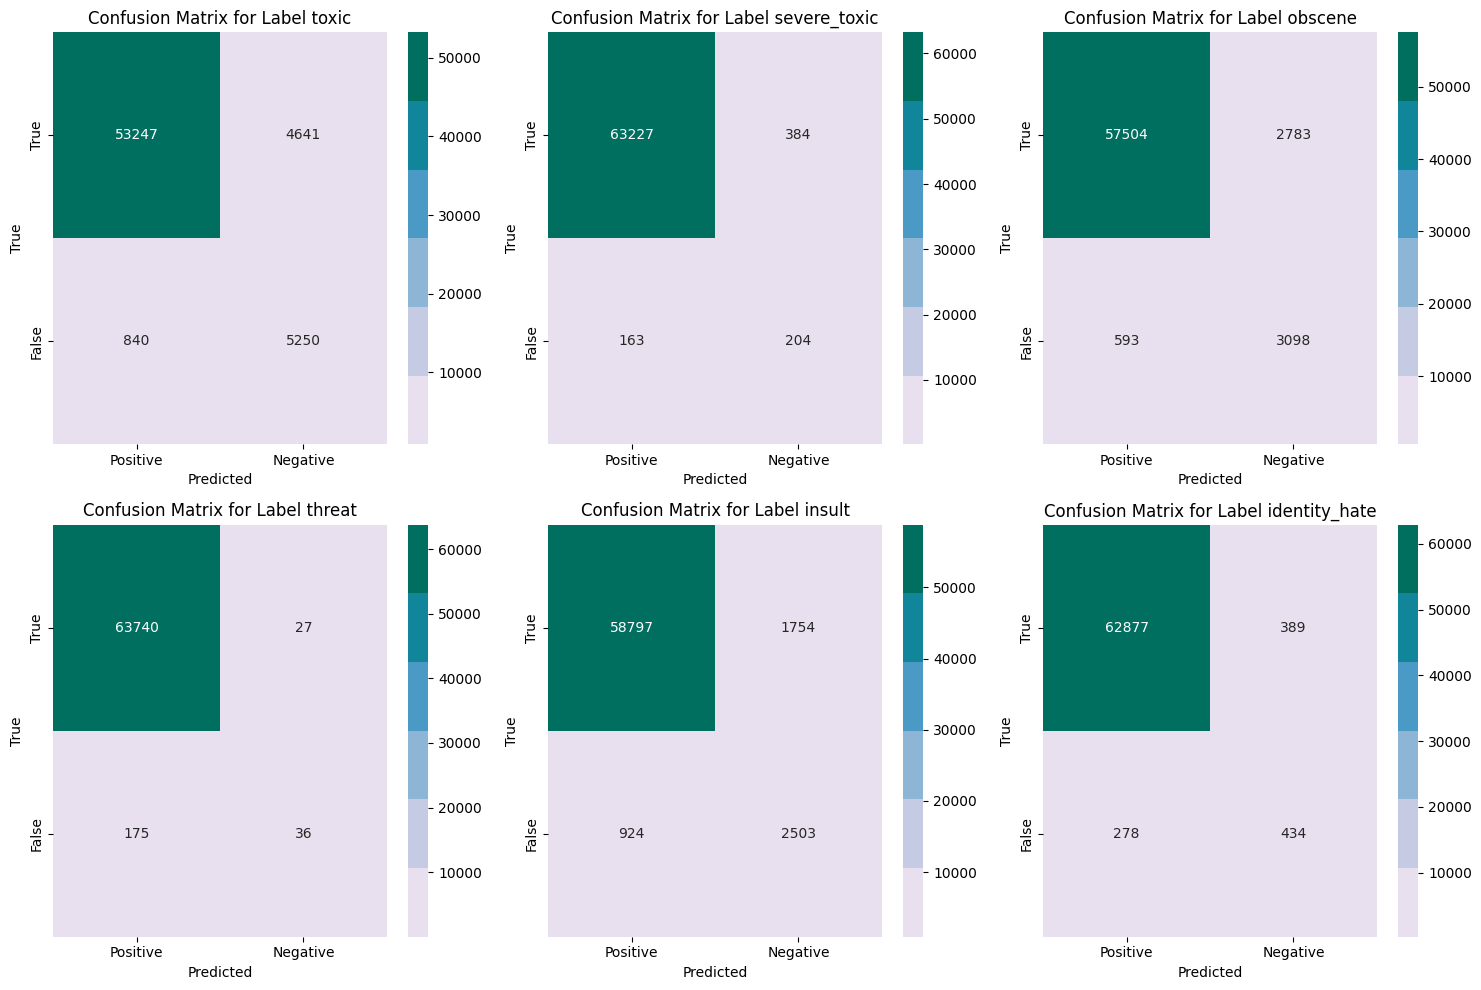

In [22]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import multilabel_confusion_matrix
import seaborn as sns

# Create a multilabel confusion matrix
confusion_matrix = multilabel_confusion_matrix(y_actual, y_pred)

yticklabels = ["True", "False"]
xticklabels = ["Positive", "Negative"]

# Create a subplot with 2 rows and 3 columns
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Plot a heatmap for each label's confusion matrix
custom_cmap = sns.color_palette("PuBuGn")

for i, ax in enumerate(axes.flatten()):
    if i < len(confusion_matrix):
        sns.heatmap(confusion_matrix[i], annot=True, fmt="d", cmap=custom_cmap, xticklabels=xticklabels, yticklabels=yticklabels, ax=ax)
        ax.set_title(f'Confusion Matrix for Label {labels[i]}')
        ax.set_xlabel('Predicted')
        ax.set_ylabel('True')

# Adjust the layout
plt.tight_layout()
plt.show()

